In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
               7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [12]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))


In [13]:
np.ones(5)
np.zeros(5)
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
from sklearn.model_selection import train_test_split

# 기본적으로 25% 를 테스트 세트로 나눠줌
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42
)


In [15]:
train_input.shape


(36, 2)

In [16]:
test_input.shape


(13, 2)

In [17]:
# 10 개가 도미(1), 3개가 빙어(0)
test_target


array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
# 10 개가 도미(1), 3개가 빙어(0) 는 빙어의 비율이 조금 모자란 것 같다.
# 원래 데이터 비율은 35:14 --> 2.5:1 이었으므로 ..
# stratify 매개변수 설정을 통해 조정해 보자

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)

# 빙어(0) 가 4개로 늘었다.
test_target


array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

In [20]:
kn.predict([[25, 150]])  # 도미(1) 로 판단되어야 할 것 같은데 빙어(0) 으로 판단했다!


array([0.])

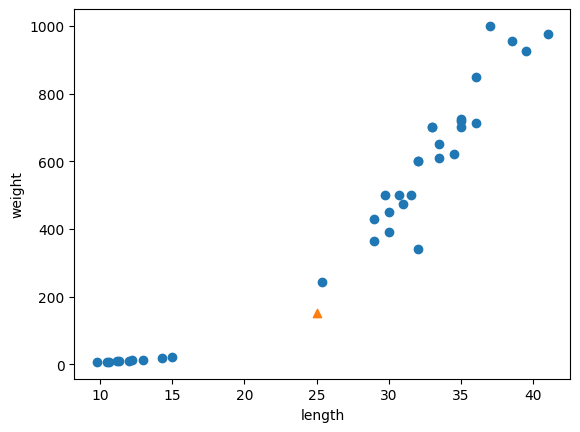

In [54]:
# 문제의 [25, 150] 을 그래프로 그려보자

import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [55]:
distances, indexes = kn.kneighbors([[25, 150]])


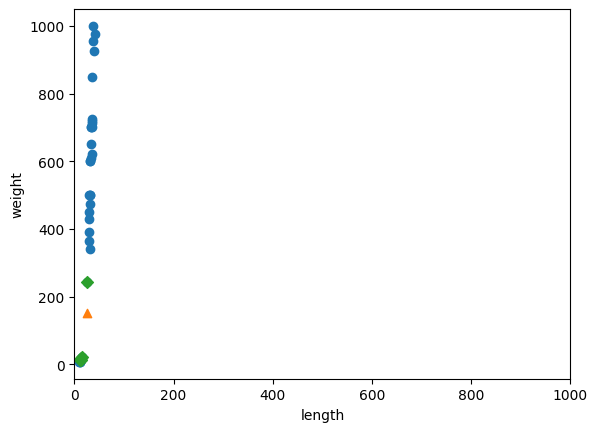

In [59]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
# plt.xlim(0, 1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [63]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

(mean, std)


(array([ 27.29722222, 454.09722222]), array([  9.98244253, 323.29893931]))

In [64]:
train_scaled = (train_input - mean) / std
train_scaled


array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

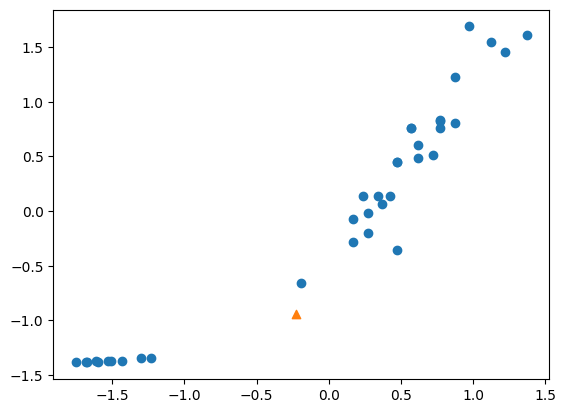

In [68]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

new = ([25, 150] - mean) / std
plt.scatter(new[0], new[1], marker='^')


In [69]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)


1.0

In [70]:
kn.predict([new])


array([1.])

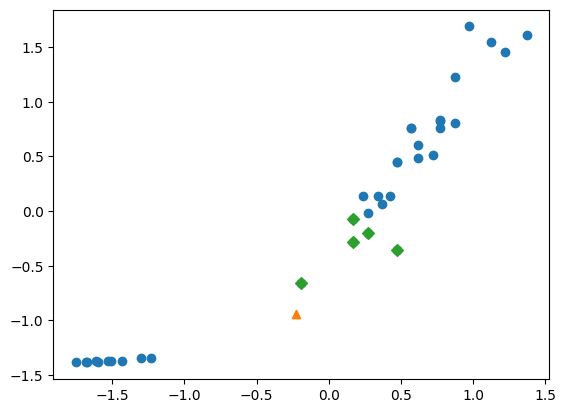

In [72]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.show()
